In [37]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
df=df.rename(columns={'Alcohol':'Alcool', 'Ash':'Po',
                       'Ash_Alcanity':'Alcalinidade_po', 'Magnesium':'Magnesio',
                       'Color_Intensity':'Intensidade_de_cor' })
df.head()                       

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

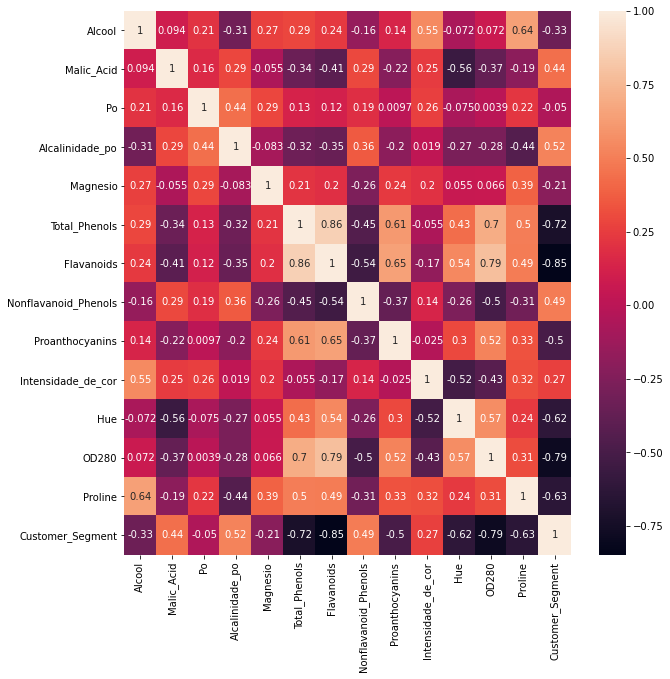

In [5]:
matriz_corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matriz_corr,annot=True)

In [6]:
min_max_scaler=preprocessing.MinMaxScaler()
np_df=min_max_scaler.fit_transform(df)

In [7]:
df=pd.DataFrame(np_df,columns=df.columns)
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [8]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
np_df=min_max_scaler.inverse_transform(df)

In [10]:
df=pd.DataFrame(np_df,columns=df.columns)
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


In [11]:
clusters=KMeans(n_clusters=4)
clusters.fit(df)

KMeans(n_clusters=4)

In [12]:
labels=clusters.labels_
print(labels)

[0 0 2 2 3 2 2 2 0 0 2 2 2 0 2 2 2 0 2 3 3 3 0 0 3 3 2 2 0 0 2 2 0 2 0 0 0
 0 0 3 3 0 0 3 0 0 0 0 0 2 0 2 2 2 0 0 0 2 2 1 3 1 3 1 1 3 1 1 3 3 0 1 1 0
 0 1 1 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 1 1 0 3 1 3 1 3 1 1 1 3 1 1 1 1 3 1
 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 1 1 3 3 3 3 1 3 3 3 3 1 1 3 3 1 3
 3 1 1 1 1 3 3 3 1 0 3 3 1 3 1 3 3 1 3 3 3 3 1 1 3 3 3 3 3 1]


In [13]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'],y=df['Alcool'],
                        mode='markers',
                        marker=dict(color=clusters.labels_.astype(np.float)),
                        text=labels))
fig.show()

In [14]:
clusters=KMeans(n_clusters=3)
clusters.fit(df)
labels=clusters.labels_


fig=go.Figure()
fig.add_trace(go.Scatter(x=df['Intensidade_de_cor'],y=df['Alcool'],
                        mode='markers',
                        marker=dict(color=clusters.labels_.astype(np.float)),
                        text=labels))
fig.show()

In [15]:

fig=go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],y=df['Alcool'],z=df['Proline'],
                        mode='markers',
                        marker=dict(color=clusters.labels_.astype(np.float)),
                        text=labels))
fig.show()

In [16]:
fig.update_layout(scene=dict(xaxis_title='Intesidade de cor',
                             yaxis_title='Alcool',
                             zaxis_title='Proline'   ))

In [17]:
centros=pd.DataFrame(clusters.cluster_centers_)
centros.columns=df.columns
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,2.275362
1,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,1.021277
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,2.258065


In [18]:

fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],y=centros['Alcool'],z=centros['Proline'],
                        mode='markers',
                        marker=dict(color='red'),
                        text=[0,1,2]))
fig.show()

In [19]:
min_max_scaler=preprocessing.MinMaxScaler()
np_df=min_max_scaler.fit_transform(df)
df_scaled=pd.DataFrame(np_df,columns=df.columns)
df_scaled.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [20]:
 dbscan=DBSCAN(eps=1.31,min_samples=15,metric='manhattan')
 dbscan.fit(df_scaled)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [21]:
dbscan.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [22]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [23]:
 dbscan=DBSCAN(eps=1.5,min_samples=15,metric='manhattan')
 dbscan.fit(df_scaled)
 dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  2,  2,  2,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [24]:
mean_sht=MeanShift()
mean_sht.fit(df)
mean_sht.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [29]:
BW=estimate_bandwidth(df,quantile=0.1)
BW

63.180850991985075

In [30]:
mean_sht=MeanShift(bandwidth=BW)
mean_sht.fit(df)
mean_sht.labels_

array([ 4,  4,  8,  9,  5,  9,  7,  7,  4,  4,  9,  7,  7,  8,  9,  7,  7,
        8, 10,  6,  5,  5,  4,  4,  6,  6,  8,  7,  6,  4,  7,  9,  4,  7,
        8,  6,  6,  8,  4,  5,  5,  4,  8,  1,  6,  4,  4,  4,  4,  7,  8,
        7,  8,  7,  4,  8,  4,  7,  7,  0,  1,  3,  1,  3,  3,  1,  0,  0,
        5,  5,  6,  3,  3,  4,  6,  3,  3,  0,  5,  3,  3,  1,  1,  0,  0,
        3,  0,  2,  1,  1,  0,  3,  0,  3,  3,  6,  1,  3,  1,  3,  1,  2,
        3,  3,  1,  3,  0,  0,  3,  1,  2,  3,  2,  3,  3,  3,  0,  3,  3,
        2,  1,  3,  3,  3,  3,  3,  3,  3,  3,  2,  1,  0,  2,  2,  1,  1,
        1,  0,  2,  2,  2,  5,  0,  2,  6,  6,  3,  1,  1,  2,  0,  0,  3,
        1,  1,  5,  0,  6,  1,  1,  0,  1,  2,  1,  1,  0,  1,  1,  5,  1,
        0,  3,  1,  5,  5,  6,  6,  2], dtype=int64)

In [31]:
clusters=KMeans(n_clusters=5)
clusters.fit(df)
clusters.labels_

array([4, 4, 4, 2, 0, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 0, 0, 0,
       4, 4, 0, 0, 4, 2, 0, 4, 2, 2, 4, 2, 4, 0, 0, 4, 4, 0, 0, 4, 4, 3,
       0, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 2, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 0, 3, 0, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 1, 3, 0, 0, 1, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 1, 0, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 0, 3, 1, 1, 3, 0, 0, 0,
       0, 3])

In [36]:
labels=clusters.labels_
fig=go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],y=df['Alcool'],z=df['Proline'],
                            mode='markers',
                            marker=dict(color=clusters.labels_.astype(float)),
                            text=labels))

In [ ]:
#coeficiente de silhueta
# coesão - grupo
# dessimilaridade em relação aos outros grups

In [41]:
faixa_n_cluster=np.arange(2,10)
faixa_n_cluster

array([2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
valores_silhueta=[]
dataframe=df
for i in faixa_n_cluster:
    agrupador=KMeans(n_clusters=i)
    labels=agrupador.fit_predict(dataframe)
    media_silhueta=silhouette_score(dataframe,labels)
    valores_silhueta.append(media_silhueta)


In [53]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=faixa_n_cluster,y=valores_silhueta))
fig.update_layout(title='Valores de silhueta médio')

In [84]:
valores_silhueta=[]
dataframe=df
for i in faixa_n_cluster:
    agrupador=KMeans(n_clusters=i)
    labels=agrupador.fit_predict(dataframe)
    media_silhueta=silhouette_score(dataframe,labels)
    valores_silhueta.append(media_silhueta)


fig=go.Figure()
fig.add_trace(go.Scatter(x=faixa_n_cluster,y=valores_silhueta))
fig.update_layout(title='Valores de silhueta médio')

In [59]:
faixa_quantile=np.linspace(0.2,0.5,15)

In [82]:
valores_silhueta=[]
dataframe=df
for i in faixa_quantile:
    BW=estimate_bandwidth(dataframe,quantile=i)
    agrupador=MeanShift(bandwidth=BW)
    labels=agrupador.fit_predict(dataframe)
    if(len(np.unique(labels))>1 and len(np.unique(labels))<len(dataframe)):
        media_silhueta=silhouette_score(dataframe,labels)
        valores_silhueta.append(media_silhueta)

In [83]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=faixa_quantile,y=valores_silhueta))
fig.update_layout(title='Valores de silhueta médio')

In [85]:
valores_silhueta=[]
dataframe=df_scaled
for i in faixa_quantile:
    BW=estimate_bandwidth(dataframe,quantile=i)
    agrupador=MeanShift(bandwidth=BW)
    labels=agrupador.fit_predict(dataframe)
    if(len(np.unique(labels))>1 and len(np.unique(labels))<len(dataframe)):
        media_silhueta=silhouette_score(dataframe,labels)
        valores_silhueta.append(media_silhueta)


fig=go.Figure()
fig.add_trace(go.Scatter(x=faixa_quantile,y=valores_silhueta))
fig.update_layout(title='Valores de silhueta médio')

In [88]:
#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

In [93]:
from collections import Counter
dataframe=df_scaled
valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(dataframe)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(dataframe) and Counter(labels)[0] > 1): #porque não é possível calcular
    # silhueta para apenas  um cluster ou para número de clústeres igual
    # ao número de dados 
      media_silhueta = silhouette_score(dataframe, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

In [94]:
ind = valores_silhueta.index(max(valores_silhueta))
#@title Default title text
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                         y = [eps_plot[ind]], z = [max(valores_silhueta)],
                         mode = 'markers',marker_line_color="midnightblue", 
                          marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                         y = eps_plot, z = valores_silhueta,
                         mode = 'markers',
                        text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='eps',
                    yaxis_title='min_samples',
                    zaxis_title='silhueta'))
fig.show()